> 问题 4: 请分析附件中的数据，基于时间、旅游人数、旅游出发地和目的地，
你们还可以分析得出哪些结论，并进行数据的挖掘和可视化分析

### 时间趋势分析

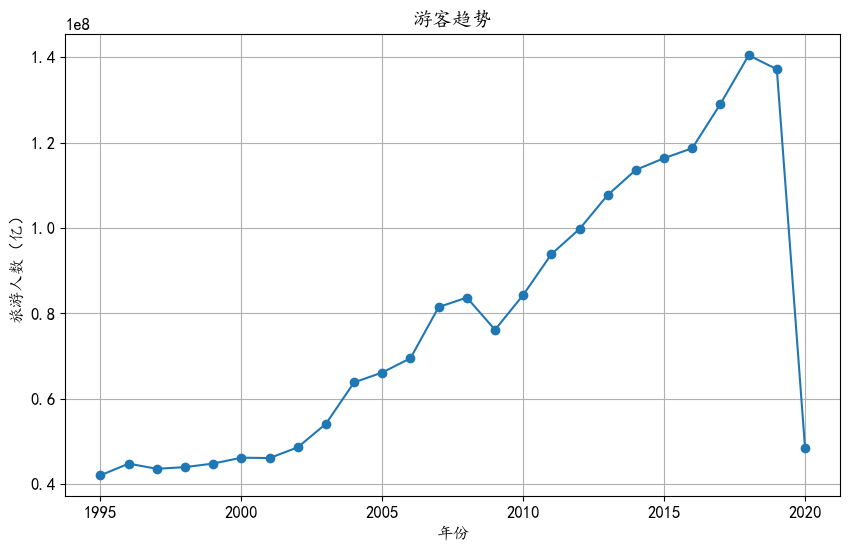

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/A.csv', encoding = 'gb2312')  # 替换为你的数据文件名

# 按年份汇总旅游人数
yearly_data = data.groupby('年份')['国际旅游人数'].sum()

# 绘制折线图
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
yearly_data.plot(marker='o')
plt.title('游客趋势')
plt.xlabel('年份')
plt.ylabel('旅游人数（亿）')
plt.grid(True)
plt.show()


### 国家间旅游关系分析

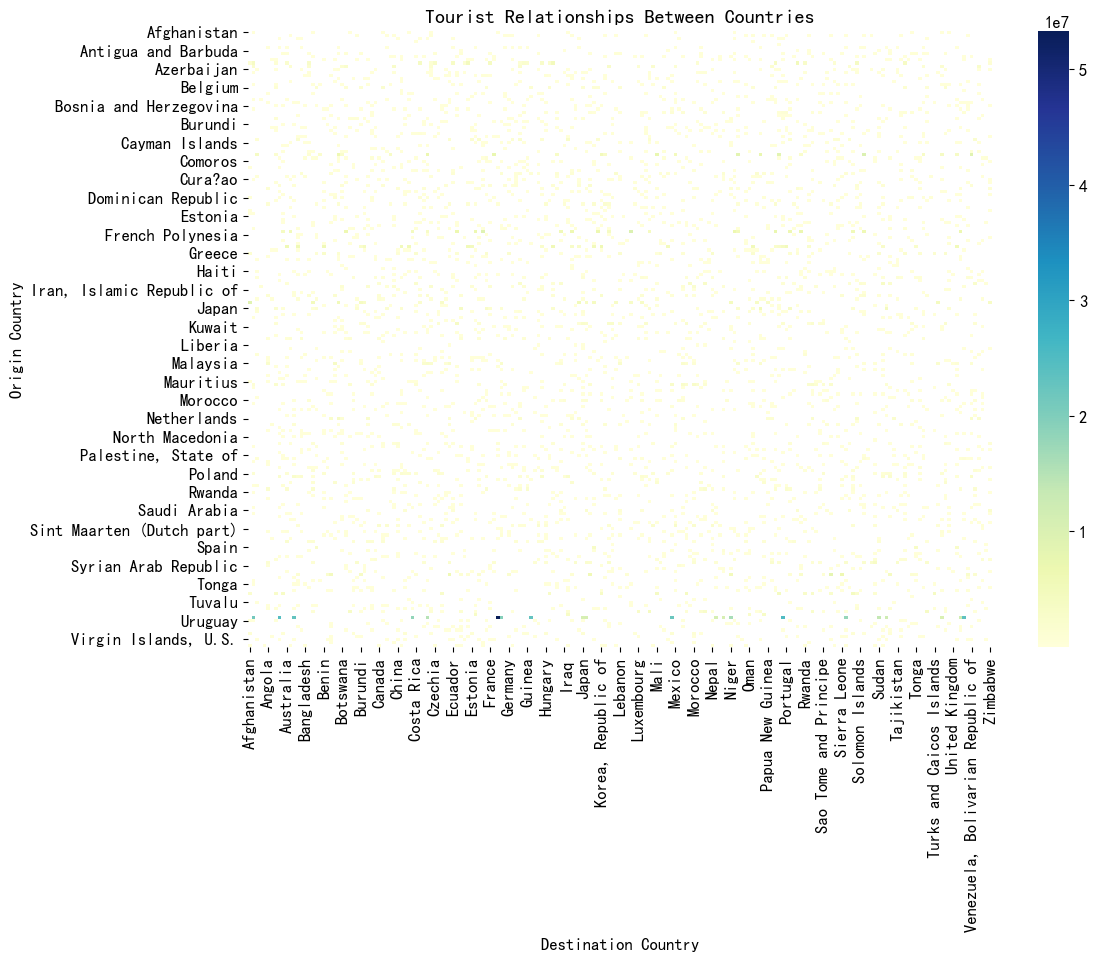

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/A.csv', encoding = 'gb2312')  # 替换为你的数据文件名

# 创建透视表，以出发国家和到达国家为索引，旅游人数为值
pivot_table = data.pivot_table(index='旅游出发国家', columns='旅游到达国家', values='国际旅游人数', aggfunc='sum')

# 绘制热力图
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, cmap='YlGnBu')
plt.title('国家间旅游关系分析')
plt.xlabel('旅游到达国家')
plt.ylabel('旅游出发国家')
plt.show()


### 最热门的旅游路径分析

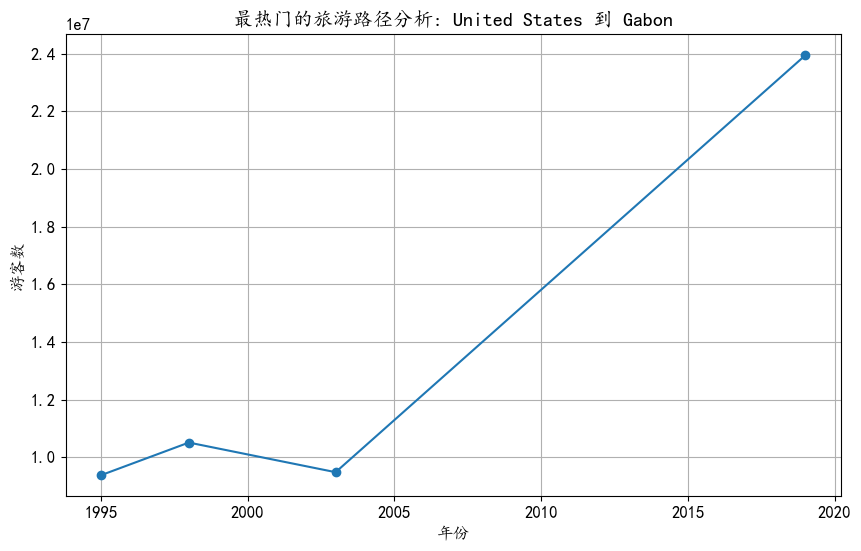

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# 读取数据
data = pd.read_csv('data/A.csv', encoding = 'gb2312')  # 替换为你的数据文件名

# 按路径和年份汇总旅游人数
path_yearly_data = data.groupby(['旅游出发国家', '旅游到达国家', '年份'])['国际旅游人数'].sum().reset_index()

# 选择最频繁的路径
most_frequent_path = path_yearly_data.groupby(['旅游出发国家', '旅游到达国家'])['国际旅游人数'].sum().idxmax()
most_frequent_data = path_yearly_data[(path_yearly_data['旅游出发国家'] == most_frequent_path[0]) & (path_yearly_data['旅游到达国家'] == most_frequent_path[1])]

# 绘制动态折线图
plt.rcParams['font.sans-serif'] = ['KaiTi', 'SimHei', 'FangSong']
plt.rcParams['font.size'] = 12
plt.rcParams['axes.unicode_minus'] = False
plt.figure(figsize=(10, 6))
plt.plot(most_frequent_data['年份'], most_frequent_data['国际旅游人数'], marker='o')
plt.title(f'最热门的旅游路径分析: {most_frequent_path[0]} 到 {most_frequent_path[1]}')
plt.xlabel('年份')
plt.ylabel('游客数')
plt.grid(True)
plt.show()
